In [2]:
from datetime import datetime
from pprint import pprint
from time import sleep
import csv
import locale
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

Etapa 4 - Limpieza, organización y visualización 

In [3]:
#Importar el csv descargado desde Airtable
archivo = "datos_airtable.csv"

df_descargado = pd.read_csv(archivo)

In [4]:
df_descargado.head(2)

,id,createdTime,fields.Temp Max,fields.Viento,fields.Lluvia,fields.Tiempo,fields.Temp Min,fields.Ubicacion,fields.Fecha
0,rec01K8KaBvXI5EDf,2024-01-10T18:09:14.000Z,24,18,0.0,Parcialmente nublado,12,Madrid,18 de abril 2022
1,rec01RliefQAF5CmE,2024-01-10T18:05:28.000Z,25,14,0.0,Nublado,17,Málaga,11 de mayo 2023


In [5]:
def limpieza(df):
    import locale
    from datetime import datetime
    
    df = df.iloc[:, 2:]
    
    #Nombrar cabeceras
    columnas = ["Temp Max (ºC)", "Viento (Km/h)", "Lluvia (mm)", "Tiempo", "Temp Min (ºC)", "Ubicacion","Fecha"]
    df.columns = columnas 
    
    #Set Español para que datetime entienda los meses en español
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
    #Cambiar columna de fecha a tipo datetime
    df["Fecha"] = pd.to_datetime(df["Fecha"], format = "%d de %B %Y")
    df = df.drop('Tiempo', axis=1)
    df['Año'] = df['Fecha'].dt.year
    
    return df

In [6]:
df_descargado = limpieza(df_descargado)
df_descargado.head(2)

,Temp Max (ºC),Viento (Km/h),Lluvia (mm),Temp Min (ºC),Ubicacion,Fecha,Año
0,24,18,0.0,12,Madrid,2022-04-18,2022
1,25,14,0.0,17,Málaga,2023-05-11,2023


Total de precipitaciones en el año de cada ubicacion

In [7]:
import plotly.express as px
data_lluvia_anual = df_descargado.groupby(["Ubicacion", "Año"])["Lluvia (mm)"].sum().reset_index()
fig = px.bar(data_lluvia_anual, x="Año", y="Lluvia (mm)", color="Ubicacion",
             title="Precipitaciones anuales",
             labels={"Lluvia (mm)": "Suma de Lluvia (mm)", "Año": "Año"})

fig.update_layout(xaxis_title="Año", yaxis_title="Total de Lluvia (mm)", width=800, height=400)

fig.show()

Promedio de precipitaciones en cada año y por ubicacion

In [8]:
promedio_lluvia_por_año_ubicacion = df_descargado.groupby(["Ubicacion", "Año"])["Lluvia (mm)"].mean().reset_index()

fig = px.bar(promedio_lluvia_por_año_ubicacion, x="Ubicacion", y="Lluvia (mm)",
             color="Año",
             labels={"Lluvia (mm)": "Promedio de Lluvias (mm)", "Ubicacion": "Ubicación"},
             title="Promedio de Lluvias por Año y Ubicación")

fig.update_layout(xaxis_title="Ubicación", yaxis_title="Promedio de Lluvias (mm)",width=800, height=500)

fig.show()

Maximas y minimas absolutas anuales

In [9]:
df_anual = df_descargado.groupby(["Ubicacion", "Año"]).agg({"Temp Max (ºC)": "max", "Temp Min (ºC)": "min"}).reset_index()

fig = px.scatter(df_anual, x="Año", y=["Temp Max (ºC)", "Temp Min (ºC)"], color="Ubicacion",
                 title="Temperaturas Máximas y Mínimas Absolutas Anuales",
                 labels={"value": "Temperatura en (°C)", "Año": "Año"})

fig.update_layout(xaxis_title='Año', yaxis_title='Temperatura (°C)', height=350, width = 800)
fig.show()

In [10]:
df_anual = df_descargado.groupby(["Ubicacion", "Año"]).agg({"Temp Max (ºC)": "max", "Temp Min (ºC)": "min"}).reset_index()

fig = px.line(df_anual, x="Año", y=["Temp Max (ºC)", "Temp Min (ºC)"], color="Ubicacion",
              title="Temperaturas Máximas y Mínimas Absolutas Anuales",
              labels={"value": "Temperatura en (°C)", "Año": "Año"})

fig.update_layout(xaxis_title='Año', yaxis_title='Temperatura (°C)', height=350, width=700)
fig.show()


Promedios de temperaturas

In [11]:
df_anual_promedio = df_descargado.groupby(["Ubicacion", "Año"]).agg({"Temp Max (ºC)": "mean", "Temp Min (ºC)": "mean"}).reset_index()

fig = px.line(df_anual_promedio, x="Año", y=["Temp Max (ºC)", "Temp Min (ºC)"], color="Ubicacion",
              title="Promedio de Temperaturas Máximas y Mínimas Anuales por Ubicación",
              labels={"value": "Temperatura en (°C)", "Año": "Año"})

fig.update_layout(xaxis_title='Año', yaxis_title='Temperatura Promedio (°C)', height=350, width=700)
fig.show()


In [12]:
df_anual_promedio = df_descargado.groupby(["Ubicacion", "Año"]).agg({"Temp Max (ºC)": "mean", "Temp Min (ºC)": "mean"}).reset_index()

fig = px.line(df_anual_promedio, x="Año", y=["Temp Max (ºC)", "Temp Min (ºC)"],
              color="Ubicacion", facet_row="Ubicacion",
              labels={"value": "Temperatura Promedio (°C)", "Año": "Año"},
              title="Promedio de Temperaturas Máximas y Mínimas Anuales por Ubicación")

fig.update_layout(xaxis_title='Año', yaxis_title='Temperatura Promedio (°C)',
                  height=950, width=700)

fig.show()


Heatmap

In [13]:
px.imshow(img       = df_descargado[["Temp Max (ºC)", "Viento (Km/h)", "Lluvia (mm)", "Temp Min (ºC)"]].corr().round(3),
          text_auto = True)

Promedio de vientos en general

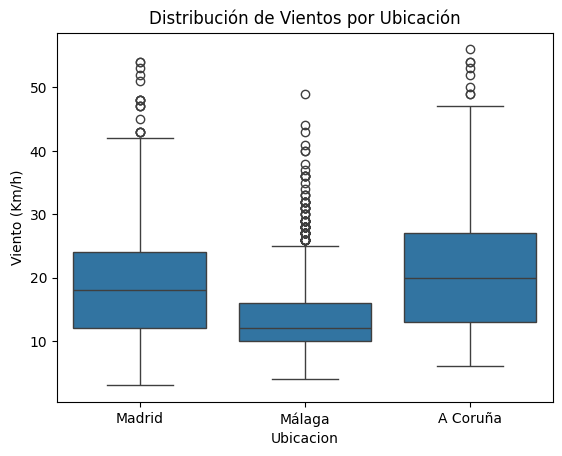

In [14]:
sns.boxplot(x="Ubicacion", y="Viento (Km/h)", data=df_descargado)
plt.title("Distribución de Vientos por Ubicación")
plt.show()

 Grafica de Promedio Anual de vientos

In [29]:
fig = px.bar(df_descargado.groupby(["Ubicacion", "Año"])["Viento (Km/h)"].mean().reset_index(),
             x="Año", y="Viento (Km/h)", color="Ubicacion",
             title="Promedio de Vientos Anuales por Ubicación",
             labels={"Viento (Km/h)": "Promedio de Vientos (Km/h)", "Ubicacion": "Ubicación"},
             width=800, height=400)

